<a href="https://colab.research.google.com/github/Thota-naga-venkata-pramod/ML_Notes/blob/me/label_and_onehot%20encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Choosing the right Encoding method-Label vs OneHot Encoder

#Label Encoder
Label Encoder:
Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

Consider below example:

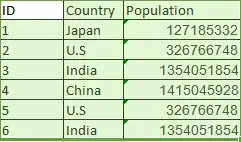

If we have to pass this data to the model we need to encode the Country column to its numeric representation by using Label Encoder. After applying Label Encoder we will get a result as seen below

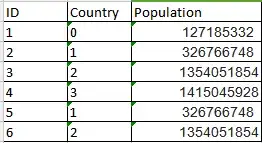


The categorical values have been converted into numeric values.
That’s all label encoding is about. But depending on the data, label encoding introduces a new problem. For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.

The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2.

The model may derive a correlation like as the country number increases the population increases but this clearly may not be the scenario in some other data or the prediction set. To overcome this problem, we use One Hot Encoder.

#importing the libraries
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("Salary.csv")

output:


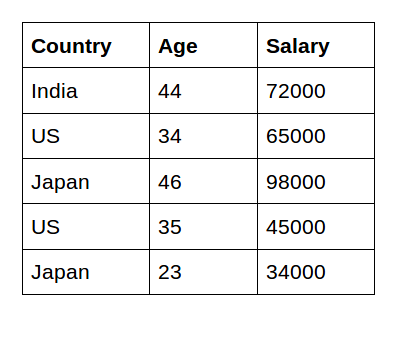


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Country']= label_encoder.fit_transform(data[‘Country']) 
print(data.head())

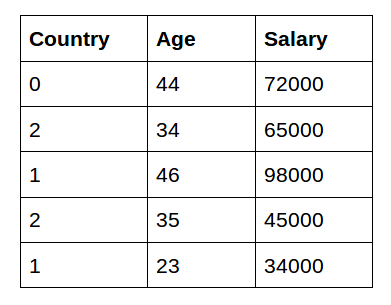



As you can see here, label encoding uses alphabetical ordering. Hence, India has been encoded with 0, the US with 2, and Japan with 1.

#one hot encoder
One Hot Encoder:
Now, as we already discussed, depending on the data we have, we might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. In our example, we’ll get four new columns, one for each country — Japan, U.S, India, and China.

For rows which have the first column value as Japan, the ‘Japan’ column will have a ‘1’ and the other three columns will have ‘0’s. Similarly, for rows which have the first column value as the U.S, the ‘U.s’ column will have a ‘1’ and the other three columns will have ‘0’s and so on.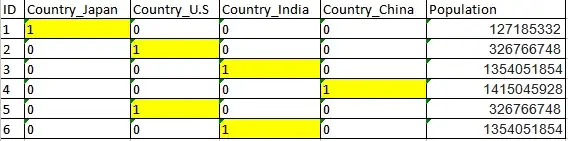

Example:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder()


df3 = pd.DataFrame(ohe.fit_transform(df[["continent"]]).toarray())


df_new=pd.concat([df,df3],axis=1)


df_new

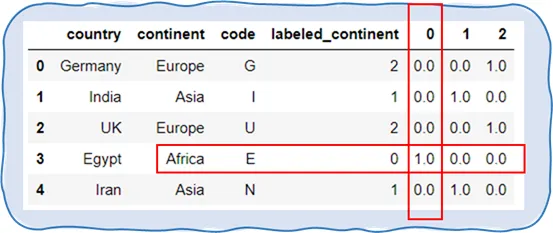

In a particular row, only one label has a value of 1 and all other labels have a value of 0. Before feeding such an encoded dataset into a machine learning model few more transformations can be done as given in OneHot Encoding


pandas.get_dummies() in Python


OneHot encoding can be implemented in a simpler way and without importing Scikit-Learn.

⚡️ Yess !! Pandas is your friend here. This simple function pandas.get_dummies() will quickly transform all the labels from specified column into individual binary columns

df2=pd.get_dummies(df[["continent"]])

df_new=pd.concat([df,df2],axis=1)

df_new

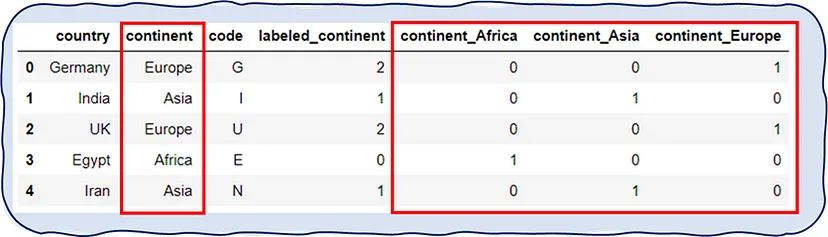






#challenges of one hot encoding
Challenges of One-Hot Encoding: Dummy Variable Trap
One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):


VIF=1, Very Less Multicollinearity

VIF<5, Moderate Multicollinearity

VIF>5, Extreme Multicollinearity (This is what we have to avoid)


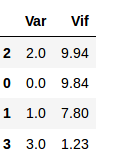

From the output, we can see that the dummy variables which are created using one-hot encoding have VIF above 5. We have a multicollinearity problem.

Now, let us drop one of the dummy variables to solve the multicollinearity issue:

df = df.drop(df.columns[[0]], axis=1)

calculate_vif(df)

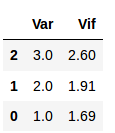



#RMSE
RMSE of One Hot Encoder is less than Label Encoder which means using One Hot encoder has given better accuracy as we know closer the RMSE to 0 better the accuracy, again don't be worried for such a large RMSE as I said this is just a sample data which has helped us to understand the impact of Label and OneHot encoder on our model.